In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
from time import time

#                                         Series
```js
        A Single Column is called Series which can be derived from a 1D Array having ANY DATATYPE VALUE or a dictionary where Each Key has only ONE VALUE!

        A Column in pandas is 'heterogeneous' i.e. can hold MULTIPLE DATATYPE VALUES unlike polars which can hold only one datatype value.

In [2]:
names = [f"Maria{i}" for i in range(8)]        
marks = np.random.choice(range(1, 10), size=(8,), replace=False)
mixed = [marks[i] if i&1 else names[i] for i in range(8)]

names_series = pd.Series(names)
marks_series = pd.Series(marks, index=names, name="Maria's Marks")
mixed_series = pd.Series(mixed)

print(f"{names_series}\n\n{marks_series}\n\n{mixed_series}\n\n")

0    Maria0
1    Maria1
2    Maria2
3    Maria3
4    Maria4
5    Maria5
6    Maria6
7    Maria7
dtype: object

Maria0    4
Maria1    7
Maria2    9
Maria3    5
Maria4    3
Maria5    6
Maria6    8
Maria7    1
Name: Maria's Marks, dtype: int32

0    Maria0
1         7
2    Maria2
3         5
4    Maria4
5         6
6    Maria6
7         1
dtype: object




In [3]:
print(mixed_series[0], type(mixed_series[0]), '\n', sep=' = ')
print(mixed_series[1], type(mixed_series[1]), '\n', sep=' = ')

print(mixed_series[1] + mixed_series[3]) # Prove that the integers remains INTEGERS.

Maria0 = <class 'str'> = 

7 = <class 'numpy.int32'> = 

12


# In Pandas the 'string datatype' is shown as 'object datatype'. Even if the column has just one string value, the dtype for that column will be 'object' BUTTT the integer objects will be integer. So integer, string, any value can live together in a single column which you see from the above code's output.

```go
        In 'marks_series' you can see `name="Maria's Marks`, this name = the Column Name of 'marks_series' BUTT you cant write marks_series["Maria's Marks"] to access the column! In Series you need to provide the 'INDEX' inside the [..]. So the "name=Maria's Marks" telling us the Values of the Series are Marias Marks. So 'name=....' is an 'attribute' of the Series object.

In [4]:
dictionary = {
    'Name'   : 'Maria',
    'Hobby'  : 'Kick',
    'Weight' : 80,
    'Age'    : 21.8
}

series_info = pd.Series(dictionary, name="Maria's Info")
series_info # the keys became index automatically.

Name      Maria
Hobby      Kick
Weight       80
Age        21.8
Name: Maria's Info, dtype: object

#                          Series Attributes (not functions)

In [5]:
n = '\n'
marks_series

Maria0    4
Maria1    7
Maria2    9
Maria3    5
Maria4    3
Maria5    6
Maria6    8
Maria7    1
Name: Maria's Marks, dtype: int32

In [6]:
print(marks_series.values, "= values", n)
print(marks_series.index, "= index", n)
print(marks_series.size, "= size", n)
print(marks_series.dtype, "= dtype", n)
print(marks_series.empty, "= empty", n)
print(marks_series.hasnans, "= hasnans", n)
print(marks_series.is_unique, "= is_unique(Is all the Items are Unique)", n)
print(marks_series.is_monotonic_increasing, "= is_monotonic_increasing", n)
print(marks_series.is_monotonic_decreasing, "= is_monotonic_decreasing", n)
print(marks_series.name, "= name", n)
print(marks_series.ndim, "= ndim", n)
print(marks_series.shape, "= shape", n)


[4 7 9 5 3 6 8 1] = values 

Index(['Maria0', 'Maria1', 'Maria2', 'Maria3', 'Maria4', 'Maria5', 'Maria6',
       'Maria7'],
      dtype='object') = index 

8 = size 

int32 = dtype 

False = empty 

False = hasnans 

True = is_unique(Is all the Items are Unique) 

False = is_monotonic_increasing 

False = is_monotonic_decreasing 

Maria's Marks = name 

1 = ndim 

(8,) = shape 



#                                               Series from real world dataset
```js
        By default 'pd.read_csv(..)' reads the file in 'DataFrame' format! If your csv has only `1 Column` or `2 Columns but you set 1 Column as Values and 2nd Column as Indexes`, only then you can you convert the DataFrame to Series by `DataFrame.squeeze()`. '.squeeze()' squeezes the DataFrame to Series.

In [7]:
n = '\n'
srs:pd.Series = pd.read_csv("D:\\datasets\\2ColumnExcel.csv", index_col='Names').squeeze()
# The csv has 2 columns(Names, Age) but I set 'Names' column to be the Index Column, so I have basically only One Column now.
print(type(srs), n)
print(srs)
# from the output you can see Name : Age i.e. my Column name is 'Age' in 'srs' object.

<class 'pandas.core.series.Series'> 

Names
Avery Bradley    25
Jae Crowder      25
John Holland     27
R.J. Hunter      22
Jonas Jerebko    29
                 ..
Trey Lyles       20
Shelvin Mack     26
Raul Neto        24
Tibor Pleiss     26
Jeff Withey      26
Name: Age, Length: 457, dtype: int64


#                                           Series Method(functions)

In [8]:
srs

Names
Avery Bradley    25
Jae Crowder      25
John Holland     27
R.J. Hunter      22
Jonas Jerebko    29
                 ..
Trey Lyles       20
Shelvin Mack     26
Raul Neto        24
Tibor Pleiss     26
Jeff Withey      26
Name: Age, Length: 457, dtype: int64

In [9]:
extra_info = lambda extra='': f" --> {extra}\n-------------------------------------------------------\n"

print(srs.head(4), extra_info('head(4)')) # The FIRST 4 rows
print(srs.tail(4), extra_info('tail(4)')) # The LAST 4 rows
print(srs.sample(7), extra_info('sample(7)')) # RANDOM 7 rows/values from the Series

Names
Avery Bradley    25
Jae Crowder      25
John Holland     27
R.J. Hunter      22
Name: Age, dtype: int64  --> head(4)
-------------------------------------------------------

Names
Shelvin Mack    26
Raul Neto       24
Tibor Pleiss    26
Jeff Withey     26
Name: Age, dtype: int64  --> tail(4)
-------------------------------------------------------

Names
Hassan Whiteside    26
Bradley Beal        22
Mike Muscala        24
Lamar Patterson     24
Jason Terry         38
Andrew Wiggins      21
Markieff Morris     26
Name: Age, dtype: int64  --> sample(7)
-------------------------------------------------------



In [10]:
# by deafult 'Series.value_counts()' returns the Frquencies of Values in SORTED(Descending) without counting 'Nan' values. 
print(srs.value_counts(), extra_info('value_counts()'))
print(srs.value_counts(ascending=True, dropna=False), extra_info('value_counts(In ascending, count Nan values also)'))
print(srs.value_counts(sort=False), extra_info('value_counts(No Sorting), frquencies in the order the Unique Values are')) # without sorting, returns frquencies in the order the Unique Values are.

# Prove the return value is A Series
counts = srs.value_counts()
print(type(counts))
print(counts.index, extra_info('indexes = Each Unique Value'))
print(counts.values, extra_info('Values = Frquencies'))

Age
24    47
25    45
27    41
23    41
26    36
28    31
30    31
29    28
22    26
31    22
20    19
21    19
33    14
32    13
34    10
36    10
35     9
37     4
38     4
40     3
39     2
19     2
Name: count, dtype: int64  --> value_counts()
-------------------------------------------------------

Age
19     2
39     2
40     3
37     4
38     4
35     9
34    10
36    10
32    13
33    14
20    19
21    19
31    22
22    26
29    28
30    31
28    31
26    36
23    41
27    41
25    45
24    47
Name: count, dtype: int64  --> value_counts(In ascending, count Nan values also)
-------------------------------------------------------

Age
25    45
27    41
22    26
29    28
21    19
24    47
20    19
26    36
28    31
32    13
23    41
30    31
33    14
34    10
37     4
36    10
31    22
38     4
39     2
19     2
35     9
40     3
Name: count, dtype: int64  --> value_counts(No Sorting), frquencies in the order the Unique Values are
--------------------------------------------------

In [11]:
print(srs.sort_values(), extra_info('Sorted by values')) # by default ascending = True, inplace = False

srs_copy = srs.copy()
srs_copy.sort_values(ascending=False, inplace=True) # sort inplace
print(srs_copy, extra_info('sorted in place in Descending order'))

print(srs.sort_index(), extra_info('sorted the index column')) # same as sort_values() but sort_index() sort the index column

Names
Rashad Vaughn         19
Devin Booker          19
Kristaps Porzingis    20
Tyus Jones            20
Cliff Alexander       20
                      ..
Vince Carter          39
Pablo Prigioni        39
Tim Duncan            40
Kevin Garnett         40
Andre Miller          40
Name: Age, Length: 457, dtype: int64  --> Sorted by values
-------------------------------------------------------

Names
Andre Miller          40
Kevin Garnett         40
Tim Duncan            40
Vince Carter          39
Pablo Prigioni        39
                      ..
Kristaps Porzingis    20
Tyus Jones            20
Christian Wood        20
Rashad Vaughn         19
Devin Booker          19
Name: Age, Length: 457, dtype: int64  --> sorted in place in Descending order
-------------------------------------------------------

Names
Aaron Brooks       31
Aaron Gordon       20
Aaron Harrison     21
Adreian Payne      25
Al Horford         30
                   ..
Wilson Chandler    29
Xavier Munford     24
Zach 

In [12]:
temp_srs = pd.Series([1, 5, 2, np.nan, 4, np.nan,  8, 5, 1])

print(temp_srs.isna().sum(), extra_info("Number of Nan values in 'temp_srs'")) # isna() returns BOOLEAN SERIES i.e. mask.
print(temp_srs.dropna(),     extra_info("drop Nan values")) # inplace = False by default.
print(temp_srs.fillna(123),  extra_info("fill the Nan values with 123")) # inplace = False by default.

print(temp_srs.drop_duplicates(),            extra_info("drop_duplicates()")) # by default keep='first', for example from [1, 1, 1..] the FIRST 1 is KEPT and the next 1s are DROPPED.
print(temp_srs.drop_duplicates(keep='last'), extra_info("drop_duplicates(keep='last')")) # The LAST ONE is kept and PREVIOUS DUPLICATES ARE DROPPED!

print(temp_srs.astype('str'),            extra_info("astype('str')")) # can't convert to int because Nan can't be converted to int.
print(temp_srs.between(left=4, right=8), extra_info("Is every Value between 4 and 8? (Both are INCLUSIVE)"))
print(temp_srs.clip(lower=3, upper=6),   extra_info("clip(lower=3, upper=6)")) # by default inplace=False. It works like np.clip(..)
print(temp_srs.isin([8, 3, 1]), extra_info("isin([8, 3, 1])")) # returns a Boolean Series denoting which values of [8, 3, 1] are IN 'temp_srs'.

2  --> Number of Nan values in 'temp_srs'
-------------------------------------------------------

0    1.0
1    5.0
2    2.0
4    4.0
6    8.0
7    5.0
8    1.0
dtype: float64  --> drop Nan values
-------------------------------------------------------

0      1.0
1      5.0
2      2.0
3    123.0
4      4.0
5    123.0
6      8.0
7      5.0
8      1.0
dtype: float64  --> fill the Nan values with 123
-------------------------------------------------------

0    1.0
1    5.0
2    2.0
3    NaN
4    4.0
6    8.0
dtype: float64  --> drop_duplicates()
-------------------------------------------------------

2    2.0
4    4.0
5    NaN
6    8.0
7    5.0
8    1.0
dtype: float64  --> drop_duplicates(keep='last')
-------------------------------------------------------

0    1.0
1    5.0
2    2.0
3    nan
4    4.0
5    nan
6    8.0
7    5.0
8    1.0
dtype: object  --> astype('str')
-------------------------------------------------------

0    False
1     True
2    False
3    False
4     True
5    

In [13]:
myName_srs = pd.Series(['Sam Samu Sami', 'Nokia Alia', 'Maria Schillerefy', 'America Yaaa aaa', 'Osaka Bin Laden', 'Aaaa Aaa'])
# Q : Return a Series where each Name will be its First Name and in Upper Case.
#     This is a CUSTOM LOGIC for what we'll use ".apply(..)". Inside (..) put the lambda function or custom function NAME.

print(myName_srs.apply(lambda name : name.split()[0].upper()), '\n')

def upper(name:str) -> str: return name.split()[0].upper()
print(myName_srs.apply(upper))

0        SAM
1      NOKIA
2      MARIA
3    AMERICA
4      OSAKA
5       AAAA
dtype: object 

0        SAM
1      NOKIA
2      MARIA
3    AMERICA
4      OSAKA
5       AAAA
dtype: object


#                                   Check if the Series/DataFrame is `View` or not, `Copy` or not.
#                WARNING : DON'T WRITE IN A VIEW VERSION SERIES as IT WILL MODIFY THE ORIGINAL SERIES AS WELL.

In [14]:
temp_srs: pd.Series = srs.iloc[:5]
print(temp_srs._is_copy, temp_srs._is_view) # _is_view = True means It's a COPY

None True


In [15]:
print(srs.size, extra_info('size (also count Nans)'))
print(srs.count(), extra_info('count (ignore Nans)'))
# size counts ALL the Values where count ignores the Nan values.

print(srs.sum(), extra_info('sum'))
print(srs.astype(np.float_).product(), extra_info('product')) # inf because the product is too big display.
print(srs.mean(), extra_info('mean')) # also can do median(), mode(), std(), var().
print(srs.min(), extra_info('min')) # also can do max().
print(srs.idxmax(), extra_info('index of the maximum value')) # also can do idxmin().
print(srs.describe()) # display the 5 Numbers alongside count, mean, std.

457  --> size (also count Nans)
-------------------------------------------------------

457  --> count (ignore Nans)
-------------------------------------------------------

12311  --> sum
-------------------------------------------------------

inf  --> product
-------------------------------------------------------

26.938730853391686  --> mean
-------------------------------------------------------

19  --> min
-------------------------------------------------------

Tim Duncan  --> index of the maximum value
-------------------------------------------------------

count    457.000000
mean      26.938731
std        4.404016
min       19.000000
25%       24.000000
50%       26.000000
75%       30.000000
max       40.000000
Name: Age, dtype: float64


C:\Users\user\AppData\Roaming\Python\Python312\site-packages\numpy\core\_methods.py:53: RuntimeWarning: overflow encountered in reduce
  return umr_prod(a, axis, dtype, out, keepdims, initial, where)


#                                               Slicing and Indexing

In [16]:
srs

Names
Avery Bradley    25
Jae Crowder      25
John Holland     27
R.J. Hunter      22
Jonas Jerebko    29
                 ..
Trey Lyles       20
Shelvin Mack     26
Raul Neto        24
Tibor Pleiss     26
Jeff Withey      26
Name: Age, Length: 457, dtype: int64

In [17]:
# As you can see, the index is 'Names' not 0, 1, 2... But pandas gives us still flexibility to access with 0, 1, 2...

print(srs[2], extra_info('srs[2]'))
print(srs[-3], extra_info('srs[-3]'))

27  --> srs[2]
-------------------------------------------------------

24  --> srs[-3]
-------------------------------------------------------



C:\Users\user\AppData\Local\Temp\ipykernel_6168\4252475424.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(srs[2], extra_info('srs[2]'))
C:\Users\user\AppData\Local\Temp\ipykernel_6168\4252475424.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(srs[-3], extra_info('srs[-3]'))


# Getting FutureWarning but working! Now if you set the index as [3, 0, 1, 2] and if we try to say srs[0], now this 0 means the label name (0) inside the index column not the Array Index(0, 1, 2...).. That's why to avoid confliction we will use
```js
    Series/DataFrame .iloc[] for 'Array Indexing(0, 1, 2 ,3 ....)'
    Series/DataFrame .loc[] for 'Label(our custom Indexing)'

In [18]:
extra_info = lambda extra='': f" --> {extra}\n--------------------------------------------------------------------------------\n"
srs

Names
Avery Bradley    25
Jae Crowder      25
John Holland     27
R.J. Hunter      22
Jonas Jerebko    29
                 ..
Trey Lyles       20
Shelvin Mack     26
Raul Neto        24
Tibor Pleiss     26
Jeff Withey      26
Name: Age, Length: 457, dtype: int64

In [19]:
print(srs.iloc[-3:-1], extra_info('iloc[-3:-1]')) # negative slicing
print(srs.iloc[[0, 2, -1, -3]], extra_info('iloc[[0, 2, -1, -3]]')) # fancy indexing
print(srs.loc['Trey Lyles'], extra_info("loc['Trey Lyles']"))
print(srs.loc['Trey Lyles':'Jeff Withey':2], extra_info("loc['Trey Lyles':]")) # IMPORTANT ONE, here in 'STRING SLICING' even the ENDPOINT is INCLUSIVE.

Names
Raul Neto       24
Tibor Pleiss    26
Name: Age, dtype: int64  --> iloc[-3:-1]
--------------------------------------------------------------------------------

Names
Avery Bradley    25
John Holland     27
Jeff Withey      26
Raul Neto        24
Name: Age, dtype: int64  --> iloc[[0, 2, -1, -3]]
--------------------------------------------------------------------------------

20  --> loc['Trey Lyles']
--------------------------------------------------------------------------------

Names
Trey Lyles     20
Raul Neto      24
Jeff Withey    26
Name: Age, dtype: int64  --> loc['Trey Lyles':]
--------------------------------------------------------------------------------



In [20]:
print(srs.index[srs == 24], extra_info('Indexes of those Values which are 24'))   # The Indexes of those Values which are 24

i = srs.index.get_loc('John Holland')
print(srs.iloc[i:i+5]) # From the Index 'John Holland', get next 5 values including him.
# i = 2 because 'John Holland' is a UNIQUE INDEX, if there were multiple 'John Holland', we would get a Boolean Mask.

Index(['Jared Sullinger', 'Markel Brown', 'Langston Galloway',
       'Kendall Marshall', 'T.J. McConnell', 'Cory Joseph',
       'Jonas Valanciunas', 'Delon Wright', 'Harrison Barnes', 'Tarik Black',
       'Jordan Clarkson', 'Brandon Knight', 'Duje Dukan', 'Eric Moreland',
       'Doug McDermott', 'Tony Snell', 'Kyrie Irving', 'Rakeem Christmas',
       'Michael Carter-Williams', 'Khris Middleton', 'Dwight Powell',
       'Terrence Jones', 'Ray McCallum', 'Xavier Munford', 'Kawhi Leonard',
       'Tim Hardaway Jr.', 'Mike Muscala', 'Lamar Patterson', 'Walter Tavares',
       'Troy Daniels', 'Jeremy Lamb', 'Tyler Johnson', 'Shabazz Napier',
       'Victor Oladipo', 'Jarell Eddie', 'Joffrey Lauvergne', 'Josh Huestis',
       'Enes Kanter', 'Mitch McGary', 'Andre Roberson', 'Dion Waiters',
       'Allen Crabbe', 'Meyers Leonard', 'C.J. McCollum', 'Alec Burks',
       'Derrick Favors', 'Raul Neto'],
      dtype='object', name='Names')  --> Indexes of those Values which are 24
-----------

In [21]:
#                                               Writing data in a Series
runs_srs:pd.Series = pd.Series([7, 2, 4, 3, 8, 4], dtype=np.uint8)
runs_srs[1:8] = 56 # During Reading Data by runs_srs[3] won't give error but runs_srs[6] will.
runs_srs

0     7
1    56
2    56
3    56
4    56
5    56
dtype: uint8

In [22]:
runs_srs[7] = 2345 # the current dtype will be changed to fit this value in the Series.
runs_srs # As you can see, without writing at index 6 we can write at index 7, why? The Index Column of Pandas Series is not an Array, this index setting IS UPTO YOU, you can put [0, 1, 1000] as index column.
#          But yes, INTERNALLY pandas has it's 0 based indexing but INDEX COLUMN is TOTALLY CUSTOM!
#          In polars its different as polars doesn't have INDEX COLUMN, so polars's index is 0 BASED INDEXING.

0       7
1      56
2      56
3      56
4      56
5      56
7    2345
dtype: uint16

Names
Avery Bradley    25
Jae Crowder      25
John Holland     27
R.J. Hunter      22
Jonas Jerebko    29
                 ..
Trey Lyles       20
Shelvin Mack     26
Raul Neto        24
Tibor Pleiss     26
Jeff Withey      26
Name: Age, Length: 457, dtype: int64
Axes(0.22375,0.11;0.5775x0.77)


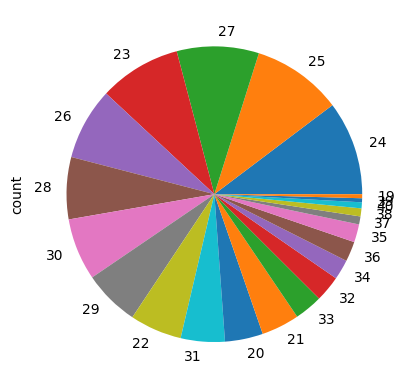

In [23]:
print(srs)
#print(srs.plot())
#print(srs.value_counts().plot(kind='bar')) # by default sort=True inside value_counts()
print(srs.value_counts().plot(kind='pie'))

In [30]:
srs1 = srs[:10]
print(srs1._is_copy)
print(srs1._is_view)

None
True
